In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

**Problem 1**

- Part A

    - Use a linear regression model to predict the number of customers each airline serves from its length of the flight and daily flight time per plane.

    - Report your model (linear equation).

    - What is your predicted value for the number of customers served for a flight that is 200 miles in length and has a daily flight time per plane of 7.2 hours? 

- Part B

    - Next, build another regression model to predict the total assets of an airline from the customer served by the airline.

    - Once again, report your model.

    - What is your prediction for total assets for an airline, given they serve 20,300,000 customers? 

In [3]:
#Loading the dataset
column_names=['airline', 
              'length_flight_miles', 
              'speed_plane', 
              'daily_flight_time', 
              'population_served', 
              'total_operating_cost', 
              'revenue',
              'ton_mile_load_factor',
              'avail_capacity', 
              'total_assets', 
              'investements_special_funds', 
              'adjusted_assets']


df_airline_cost = pd.read_csv('~/IMT_574/Week2/Homework/airline_costs.csv', names = column_names, header = None)


In [4]:
df_airline_cost.head()

,airline,length_flight_miles,speed_plane,daily_flight_time,population_served,total_operating_cost,revenue,ton_mile_load_factor,avail_capacity,total_assets,investements_special_funds,adjusted_assets
0,All American,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96


In [5]:
data_for_model = df_airline_cost[['length_flight_miles', 'daily_flight_time', 'population_served']].copy()


In [6]:
#Using copy of original dataframe to avoid messing with original data
data_for_model.shape

(31, 3)

In [8]:
def linear_regression(X, y):
    
    #Training the model with Ordinary Least Squares
    lr_model = sm.OLS(y,X).fit()

    return lr_model

In [9]:
def plotter_3d(model, X, y, x_label, y_label, z_label):
    from mpl_toolkits.mplot3d import Axes3D

    # Figure out X and Y axis using ranges from length_flight_miles and daily_flight_time
    X_axis, Y_axis = np.meshgrid(np.linspace(X.length_flight_miles.min(), X.length_flight_miles.max(), 100),
np.linspace(X.daily_flight_time.min(), X.daily_flight_time.max(), 100))
    
    # Plot the hyperplane by calculating corresponding Z axis (population_served)
    Z_axis = model.params[0] + model.params[1] * X_axis + model.params[2] * Y_axis

    # Create matplotlib 3D axes
    fig = plt.figure(figsize=(12, 8))# figsize refers to width and height ofthe figure
    ax = Axes3D(fig, azim=150)
    
    # Plot hyperplane
    ax.plot_surface(X_axis, Y_axis, Z_axis, cmap=plt.cm.coolwarm, alpha=0.5,
    linewidth=0)
    
    # Plot data points
    ax.scatter(X.length_flight_miles, X.daily_flight_time, y)

    # set axis labels
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)

***A1 - Use a linear regression model to predict the number of customers each airline serves from its length of the flight and daily flight time per plane.***

In [11]:
#Setting predictors, with constant = 1
data_for_model['constant'] = 1

y = data_for_model['population_served']
X = data_for_model[['length_flight_miles','daily_flight_time', 'constant']]

In [12]:
#Splitting the dataset in training(70%) and testing(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, shuffle = True, random_state = 11)

In [13]:
#Training the model
model_a = linear_regression(X_train, y_train)

In [14]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      population_served   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     16.52
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           8.44e-05
Time:                        00:04:21   Log-Likelihood:                -225.53
No. Observations:                  21   AIC:                             457.1
Df Residuals:                      18   BIC:                             460.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
length_flight_miles   192.9726     36.559      5.278      0.000     116.165     269.781
daily_flight_time     -53.5048   1710.405     -0.031      0.975   -3646.932    3539.923
constant            -8283.4301   1.06e+04     -0.781      0.445   -3.06e+04     1.4e+04
==============================================================================
Omnibus:                        0.255   Durbin-Watson:                   2.573
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.391
Skew:                           0.211   Prob(JB):                        0.822
Kurtosis:                       2.481   Cond. No.                         646.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***A2 - Report your model (linear equation).***

- $\hat{y}$ = $β_{0}$ + $β_{1}$ $x_{1}$ + $β_{2}$ $x_{2}$
​	 
- $β_{0}$ = intercept
- $β_{1}$, $β_{2}$ = slopes

Linear Equation:

***$\hat{y}$ = β0 + (β1 * length_flight) + (β2 * daily_flights_time)***


- β0 = -8283.4301
- β1 = 192.9726
- β2= -53.5048

population_served = -8283.4301 + (192.9726 * length_flight_miles) + (-53.5048 * daily_flight_time)

***A3 - What is your predicted value for the number of customers served for a flight that is 200 miles in length and has a daily flight time per plane of 7.2 hours?***

In [21]:
#Defining array with values to predict
length_flight= 200
daily_flight_time = 7.2
constant = 1

predictors = pd.Series([length_flight, daily_flight_time, constant])

In [22]:
#Predict outcome
y_pred_lr = model_a.predict(predictors)

print('Predicted population served (1000s): ', str(y_pred_lr.iloc[0]))

Predicted population served (1000s):  29925.863066251935


In [23]:
predicted_population_served = -8283.4301 + (192.9726 * length_flight) + (-53.5048 * daily_flight_time)
print('Manually Predicted population served (1000s): ', str(predicted_population_served))

Manually Predicted population served (1000s):  29925.85534


/var/folders/cq/0jb064816rn07k67cjcpfx700000gn/T/ipykernel_1412/369682513.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Z_axis = model.params[0] + model.params[1] * X_axis + model.params[2] * Y_axis


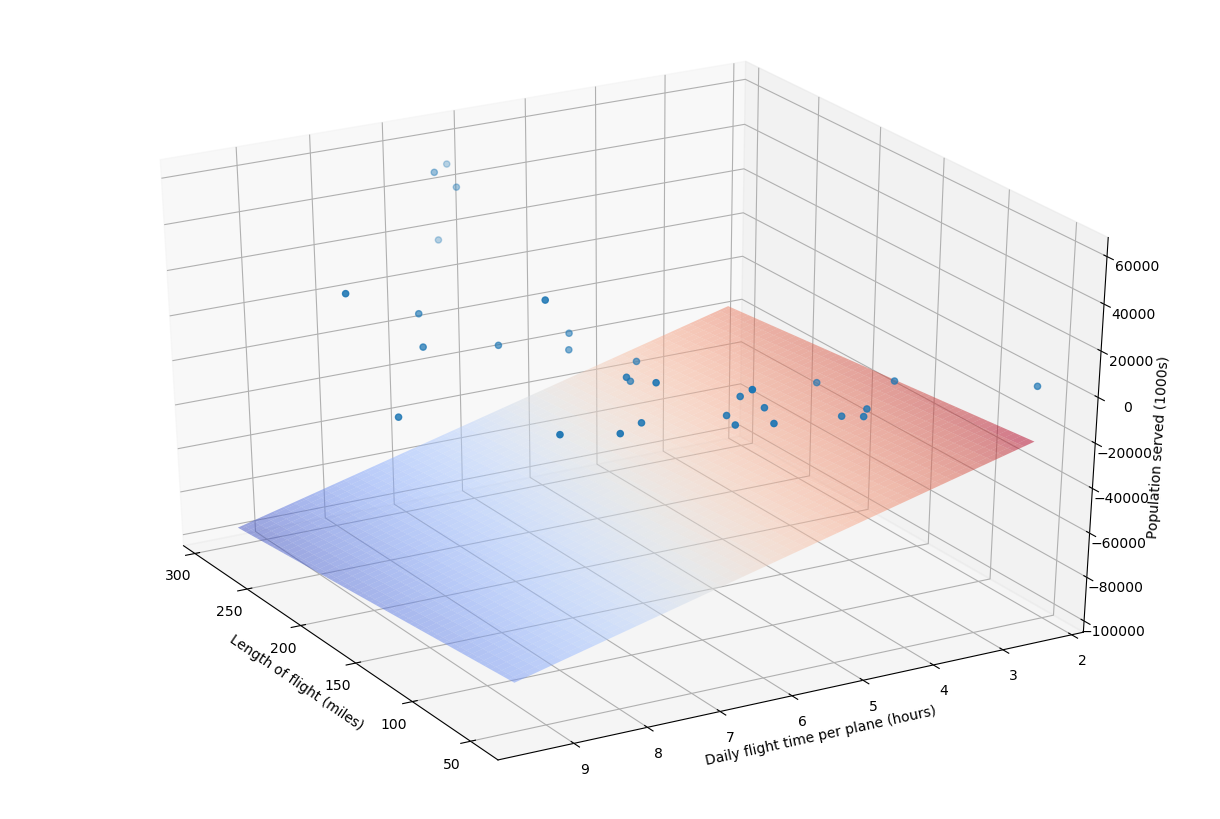

In [24]:
#Plot for Population served by daily flight time & Length of flight
plotter_3d(model_a,X, y, 'Length of flight (miles)','Daily flight time per plane (hours)', 'Population served (1000s)')

***Part B***

- B1 - Build another regression model to predict the total assets of an airline from the customer served by the airline.

In [27]:
data_for_model_b = df_airline_cost[['population_served', 'total_assets']].copy()

In [28]:
data_for_model_b.head()

,population_served,total_assets
0,20200,21.13
1,56928,1436.53
2,183,6.65
3,11869,160.30
4,41097,195.02


In [29]:
#Adding constant = 1
data_for_model_b['constant'] = 1

In [30]:
#Setting predictors
y_b = data_for_model_b['total_assets']
X_b = data_for_model_b[['population_served', 'constant']]

In [31]:
#Splitting the dataset in training(70%) and testing(30%)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b,test_size = 0.3, shuffle = True, random_state = 11)

In [32]:
#Training the model with Ordinary Least Squares
model_b = linear_regression(X_train_b,y_train_b)

In [33]:
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_assets   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     85.31
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.86e-08
Time:                        00:04:22   Log-Likelihood:                -140.77
No. Observations:                  21   AIC:                             285.5
Df Residuals:                      19   BIC:                             287.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
population_served     0.0222      0.002      9.236      0.000       0.017       0.027
constant           -111.3164     62.554     -1.780      0.091    -242.244      19.611
==============================================================================
Omnibus:                       12.923   Durbin-Watson:                   2.503
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.073
Skew:                          -1.456   Prob(JB):                      0.00394
Kurtosis:                       5.042   Cond. No.                     3.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#Testing model
y_pred_test = model_b.predict(X_test_b)
y_pred_test

15     94.318442
8     -26.150243
6     288.837910
21    -59.363053
3     152.540898
11   -101.290335
14     38.185681
22      3.016561
9     180.329393
5     -72.256915
dtype: float64

***B2 - Report your model (linear equation).***

- $\hat{y}$ = $β_{0}$ + $β_{1}$ $x_{1}$
​	 
- $β_{0}$ = intercept
- $β_{1}$, $β_{2}$ = slopes

Linear Equation:

***$\hat{y}$ = β0 + (β1 * population_served)***

- β0 = -111.3164
- β1 = 0.0222

total_assets = -111.3164 + (0.0222 * population_served)

***B3 - What is your prediction for total assets for an airline, given they serve 20,300,000 customers?*** 

In [38]:
population_served = 20300000
constant = 1

predictors=[[population_served, constant]]
y_pred_b = model_b.predict(predictors)

In [39]:
print('Predicted total number of assets($100,000s): $',str(y_pred_b[0]))

Predicted total number of assets($100,000s): $ 451173.8492456404


In [40]:
predicted_total_assets= -111.3164 + (0.0222 * population_served)
print('Manually Predicted total number of assets (1000s): ', str(predicted_total_assets))

Manually Predicted total number of assets (1000s):  450548.6836


Text(0, 0.5, 'Total assets ($100,000s)')

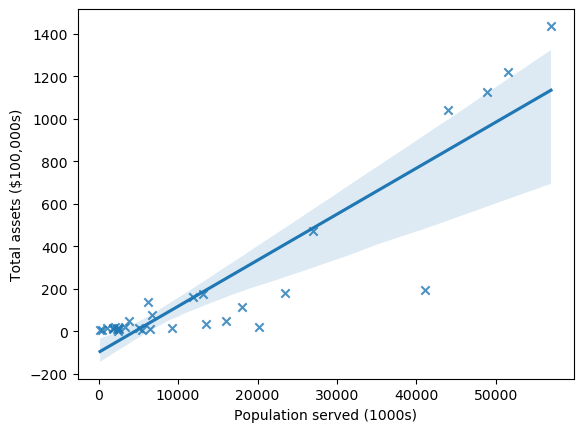

In [41]:
#Regression Plot
ax = sns.regplot(data=data_for_model_b, x='population_served', y='total_assets', marker="x")
ax.set_xlabel('Population served (1000s)')
ax.set_ylabel('Total assets ($100,000s)')

----------------------

----------------------

**Problem 2**

- Use the gradient descent algorithm to predict the optimal intercept and gradient for this problem. Report your gradient values.


In [45]:
#Loading the dataset
# X : nasal length of the Kangaroos in mm 
# Y : nasal width of the Kangaroos in mm

df_kangaroo = pd.read_csv('~/IMT_574/Week2/Homework/kangaroos_nasal_dimension_data.csv')
data_for_model_kangaroo = df_kangaroo.copy()

In [46]:
data_for_model.shape

(31, 4)

In [47]:
data_for_model_kangaroo = data_for_model_kangaroo.rename(columns={'X': 'nasal_length', 'Y': 'nasal_width'})
data_for_model_kangaroo.head()


,nasal_length,nasal_width
0,609,241
1,629,222
2,620,233
3,564,207
4,645,247


In [48]:
data_for_model_kangaroo.shape

(45, 2)

Text(0, 0.5, 'Nasal width of the Kangaroos in mm')

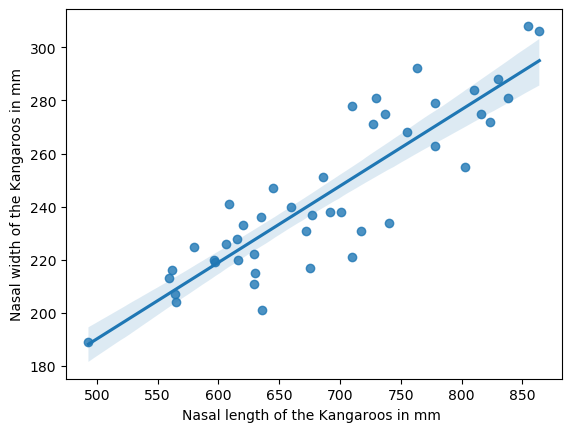

In [49]:
ax = sns.regplot(data=data_for_model_kangaroo, x='nasal_length', y='nasal_width')
ax.set_xlabel('Nasal length of the Kangaroos in mm ')
ax.set_ylabel('Nasal width of the Kangaroos in mm')

In [50]:
#Setting regressor and outcome vars
X_2 = data_for_model_kangaroo.nasal_length
y_2 = data_for_model_kangaroo.nasal_width
X_2 = sm.add_constant(X_2)

In [51]:
#Splitting the dataset in training(70%) and testing(30%)
X_train_K,X_test_K,y_train_K,y_test_K = train_test_split(X_2,y_2,test_size=0.3,shuffle=True, random_state=2)

In [52]:
model_for_kangaroo = LinearRegression()
model_for_kangaroo.fit(X_train_K,y_train_K)

# print(model_for_kangaroo.coef_)
print('Intercept with Linear Regression:', model_for_kangaroo.intercept_)

Intercept with Linear Regression: 45.95300501858193


In [53]:
y_pred_lr = model_for_kangaroo.predict(X_test_K)
r2_score_lr = r2_score(y_test_K,y_pred_lr)
print('Accuracy:', str(r2_score_lr * 100))


Accuracy: 55.153661820483975


In [54]:
#Stochastic Gradient Descent Regressor
sgd_model = SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)
sgd_model.fit(X_train_K,y_train_K)

SGDRegressor(learning_rate='constant')

In [55]:
intercept = sgd_model.intercept_
print('Optimal intercept by Stochastic Gradient Descent:', str(intercept[0]))

Optimal intercept by Stochastic Gradient Descent: 10108671042.794807


In [56]:
sgd_model.coef_

array([ 1.01066013e+10, -4.08282961e+12])

In [57]:
r2_score(y_test_K,y_pred_lr)

0.5515366182048398

Code implementation of SGD

In [59]:
def mse(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
# Gradient Descent Function
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.01, 
                     stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_slope = 0.1
    current_intercept = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    slopes = []
    previous_cost = None
     
    for i in range(iterations):
         
        y_predicted = (current_slope * x) + current_intercept
         
        current_cost = mse(y, y_predicted)
 
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        slopes.append(current_slope)
         
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        intercept_derivative = -(2/n) * sum(y-y_predicted)
         
        current_slope = current_slope - (learning_rate * weight_derivative)
        current_intercept = current_intercept - (learning_rate * intercept_derivative)
                 
        print(f"Iteration {i+1}: Cost {current_cost}, Tetha0 {current_slope}, Tetha1 {current_intercept}")
     
     
    return current_slope, current_intercept

In [60]:
#Setting regressor and outcome vars
X = data_for_model_kangaroo.nasal_length
y = data_for_model_kangaroo.nasal_width
     
 
gradient_descent(X, y, iterations=100)

Iteration 1: Cost 31261.68134444445, Tetha0 2443.0534977777784, Tetha1 3.5181111111111107
Iteration 2: Cost 2869483505844.1826, Tetha0 -23491872.236402553, Tetha1 -33578.7686274489
Iteration 3: Cost 2.653987721965396e+20, Tetha0 225925485957.03415, Tetha1 322933357.19591856
Iteration 4: Cost 2.4546754893621006e+28, Tetha0 -2172765283331650.0, Tetha1 -3105707106242.37
Iteration 5: Cost 2.270331436805957e+36, Tetha0 2.0895867309792903e+19, Tetha1 2.986813352227941e+16
Iteration 6: Cost 2.0998314666387483e+44, Tetha0 -2.0095924487478263e+23, Tetha1 -2.8724711300418096e+20
Iteration 7: Cost 1.9421358999853782e+52, Tetha0 1.9326605353067344e+27, Tetha1 2.7625061963677676e+24
Iteration 8: Cost 1.7962831369746903e+60, Tetha0 -1.8586737559944039e+31, Tetha1 -2.6567509783324542e+28
Iteration 9: Cost 1.6613837930723216e+68, Tetha0 1.787519364167102e+35, Tetha1 2.5550443181452297e+32
Iteration 10: Cost 1.5366152757700056e+76, Tetha0 -1.7190889293871213e+39, Tetha1 -2.457231227513754e+36
Iteration

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/cq/0jb064816rn07k67cjcpfx700000gn/T/ipykernel_1412/130476900.py:28: RuntimeWarning: invalid value encountered in scalar subtract
  if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:


(nan, nan)